<h1 
  id = "title"; 
  style="color:#4974a5; border-bottom: 3px solid #4974a5;"
>
  Predicting the Top Board Games to Play

</h1>  

<!--
# Which board game should you play?
--->

## 📖 Background  
#### By [DataCamp.com](https://app.datacamp.com). 


![Board Game](../images/board_game.jpg)


After a tiring week, what better way to unwind than a board game night with friends and family? But the question remains: which game should you pick? You have gathered a dataset containing information of over `20,000` board games. It's time to utilize your analytical skills and use data-driven insights to persuade your group to try the game you've chosen!

[Competition overview page.](https://app.datacamp.com/learn/competitions/board-games) 

## 💪 Challenge
Explore and analyze the board game data, and share the intriguing insights with your friends through a report. Here are some steps that might help you get started:

* Is this dataset ready for analysis? Some variables have inappropriate data types, and there are outliers and missing values. Apply data cleaning techniques to preprocess the dataset.
* Use data visualization techniques to draw further insights from the dataset. 
* Find out if the number of players impacts the game's average rating.


## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

<h2 
  id= "executive-summary"; 
  style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;"
>
  EXECUTIVE SUMMARY
</h2>

The top ten recommended boardgames are:...


<h2 
  id= "TOC"; 
  style="color:#207d06; border-bottom: 3px solid #207d06;"
>
  TABLE OF CONTENTS
</h2>


- [THE DATA](#the-data)
- [EXPLORATION](#exploration)
- [DATA CLEANING](#data-cleaning)
    - [DATA FORMAT CONSISTENCY](#data-format-consistency)
        - [ID VALUES](#id-values)
            - [MISSING ID VALUES](#missing-id-values)
            - [NOMINAL ID DATATYPE](#nominal-id-datatype)
        - [COLUMN HEADINGS](#column-headings)
        - [DATE FORMAT](#date-format)
    - [MISSING VALUES](#missing-values)
        - [ID NUMBERS](#id-numbers)
    - [OUTLIERS](#outliers)
- [FEATURE ENGINEERING](#feature-engineering)
    - [GAME MECHANICS](#game-mechanics)
- [MODELING](#modeling)
    - [SPLITTING DATA](#splitting-data)
    - [MODEL TRAINING](#model-training)
    - [MODEL EVALUATION](#model-evaluation)
    - [TUNE HYPERPARAMETERS](#tune-hyperparameters)
- [DEPLOYMENT](#deployment)
- [DISCUSSION](#discussion)
- [REFERENCES](#references)

<!--
- [PREPROCESS DATA](#preprocess-data)
- [DATA CLEANING](#revise-data-cleaning)
    - [TARGET VARIABLE REFINEMENT](#target-variable-refinement)
- [SELECTING A TARGET VARIABLE](#select-target-variable)
- [FEATURE ENGINEERING](#feature-engineering)
    - [NLP REPRESENTATIONS](#nlp-representations)
        - [N-GRAMS](#n-grams)
- [MODELING](#modeling)
    - [SPLITTING DATA](#splitting-data)
    - [MODEL TRAINING](#model-training)
    - [MODEL EVALUATION](#model-evaluation)
    - [TUNE HYPERPARAMETERS](#tune-hyperparameters)
- [DEPLOYMENT](#deployment)
- [DISCUSSION](#discussion)
- [REFERENCES](#references)
    - [DATA SOURCES](#data-sources)
    - [TEXT REFERENCES](#text-references)
--->



<!--

-->

<h2 
  id= "the-data"; 
  style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;"
>
  THE DATA
</h2>


You've come across a dataset titled `bgg_data.csv` containing details on over `20,000` ranked board games from the BoardGameGeek (BGG) website. BGG is the premier online hub for board game enthusiasts, hosting data on more than `100,000` games, inclusive of both ranked and unranked varieties. This platform thrives due to its active community, who contribute by posting reviews, ratings, images, videos, session reports, and participating in live discussions.

This specific dataset, assembled in `February 2021`, encompasses all ranked games listed on BGG up to that date. Games without a ranking were left out because they didn't garner enough reviews; for a game to earn a rank, it needs a minimum of `30` votes.

In this dataset, each row denotes a board game and is associated with some information.

| Column     | Description              |
|------------|--------------------------|
| `id` | The ID of the board game. |
| `name` | The name of the board game.|
| `year_published` | The year when the game was published.|
| `min_players` | The minimum number of player recommended for the game.|
| `max_players` | The maximum number of player recommended for the game.|
| `play_time` | The average play time suggested by game creators, measured in minutes.|
| `min_age` | The recommended minimum age of players.|
| `users_rated` | The number of users who rated the game.|
| `rating_average` | The average rating of the game, on a scale of 1 to 10.|
| `bgg_rank` | The rank of the game on the BoardGameGeek (BGG) website.| 
| `complexity_average` | The average complexity value of the game, on a scale of 1 to 5.|
| `owned_users` |  The number of BGG registered owners of the game.| 
| `mechanics` | The mechanics used by the game.| 
| `domains` | The board game domains that the game belongs to.|

**Source:** Dilini Samarasinghe, July 5, 2021, "BoardGameGeek Dataset on Board Games", IEEE Dataport, doi: https://dx.doi.org/10.21227/9g61-bs59.

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 
  id= "exploration"; 
  style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;"
>
  EXPLORATION
</h2>


In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()


In [3]:
session = 'eda'


In [4]:
boardgame = pd.read_csv('../data/bgg_data.csv')
df = boardgame.copy()

df.head()


,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [5]:
df.shape


(20343, 14)

Wonderful! As promised, we have just over 20,000 boardgames listed in the dataset.  Now let's check the status of the data with `.info()`


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 
  id= "data-cleaning"; 
  style="color:#207d06; border-bottom: 3px solid #207d06;"
>
  DATA CLEANING
</h2>

<h3 
  id= "data-format-consistency"; 
  style="color:#8fca6b; border-bottom: 2px solid #8fca6b;"
>
  DATA FORMAT CONSISTENCY
</h3>

<h4 
  id= "column-headings"; 
  style="color:#c8d43e; border-bottom: 1px solid #c8d43e;"
>
  COLUMN HEADINGS
</h4>

Change column headings to Snake case for ease of use and consistency:

In [7]:
# create list of column titles
cols = df.columns.tolist()

# change the spaces to underscores
cols = [x.replace(' ', '_') for x in cols]

# convert all to lower case
cols = [x.lower() for x in cols]

# confirm results by printing a few,
cols[:4]


['id', 'name', 'year_published', 'min_players']

In [8]:
# Create a dictionary keying the old headings to the new:
old_cols = df.columns.tolist()
col_map = dict(zip(old_cols, cols))

col_map


{'ID': 'id',
 'Name': 'name',
 'Year Published': 'year_published',
 'Min Players': 'min_players',
 'Max Players': 'max_players',
 'Play Time': 'play_time',
 'Min Age': 'min_age',
 'Users Rated': 'users_rated',
 'Rating Average': 'rating_average',
 'BGG Rank': 'bgg_rank',
 'Complexity Average': 'complexity_average',
 'Owned Users': 'owned_users',
 'Mechanics': 'mechanics',
 'Domains': 'domains'}

In [9]:
# Rename the columns in the table.
df = df.rename(columns=col_map)
df.head()


,id,name,year_published,min_players,max_players,play_time,min_age,users_rated,rating_average,bgg_rank,complexity_average,owned_users,mechanics,domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h4 
  id= "id-values"; 
  style="color:#c8d43e; border-bottom: 1px solid #c8d43e;"
>
  ID VALUES
</h4>

Above we can see that the Nominal `id` values are currently formatted as float data type. These will be converted to the preferable string object data type easily as long as there are currently no null values:

In [10]:
df[['id', 'name']].isna().sum()


id      16
name     0
dtype: int64

<h5 
  id= "missing-id-values"; 
  style="color:#ff7400; border-bottom: 1px solid #ff7400;"
>
  MISSING ID VALUES
</h5>

Okay interesting;

Above we can see that although the `name` column of game titles is complete, there are 16 null values in the `id` numbers.  

In [11]:
df[df['id'].isnull()][['id', 'name']]


,id,name
10776,NaN,Ace of Aces: Jet Eagles
10835,NaN,Die Erben von Hoax
11152,NaN,Rommel in North Africa: The War in the Desert ...
11669,NaN,Migration: A Story of Generations
12649,NaN,Die Insel der steinernen Wachter
12764,NaN,Dragon Ball Z TCG (2014 edition)
13282,NaN,Dwarfest
13984,NaN,Hus
14053,NaN,Contrario 2
14663,NaN,Warage: Extended Edition


How many of the titles and ID numbers are unique?

In [12]:
df[['id', 'name']].nunique()


id      20327
name    19976
dtype: int64

Do the duplicated game names also have duplicate data such as ID etc, or are they truly different games with the same name?

In [13]:
df[['id', 'name']].value_counts(ascending=True).head(5)


id        name                         
1.0       Die Macher                       1
165186.0  Hitler's Reich: WW2 in Europe    1
165095.0  Pirate Loot: Base Set            1
165090.0  CLUE: Firefly Edition            1
165046.0  Slavika: Equinox                 1
dtype: int64

Since there are no paired value counts greater than `1` they're probably all unique games.  Lets take a closer look at an example:

In [14]:
df['name'].value_counts().head(5)


Robin Hood          6
Gettysburg          4
Saga                4
Chaos               4
Cosmic Encounter    4
Name: name, dtype: int64

Let's check the 6 Robin Hood Games to confirm unique BGG item id numbers

In [15]:
df[df['name'] == 'Robin Hood'][['id', 'name']]


,id,name
5352,104640.0,Robin Hood
11461,258137.0,Robin Hood
15626,3569.0,Robin Hood
16474,136.0,Robin Hood
16545,1947.0,Robin Hood
19470,31794.0,Robin Hood


Excellent, that simplifies the task of turning back to the null ID numbers.  

A quick internet search confirms these ID numbers are assigned by [boardgamegeek.com](https://boardgamegeek.com).  See this link for for the [Gloomhaven - BGG Item ID: 174430](https://boardgamegeek.com/boardgame/174430/gloomhaven) example. 

In [16]:
df[df['name'] == 'Gloomhaven'][['id', 'name']]


,id,name
0,174430.0,Gloomhaven


This means we can web scrape the missing numbers right from the same website who sourced our original data set.

Creating a dataframe called `df_null_ids` with a subset of the missing `id` values.

In [17]:
# Instantiate subset df
df_null_ids = df[df['id'].isnull()][['id', 'name']].copy()
df_null_ids


,id,name
10776,NaN,Ace of Aces: Jet Eagles
10835,NaN,Die Erben von Hoax
11152,NaN,Rommel in North Africa: The War in the Desert ...
11669,NaN,Migration: A Story of Generations
12649,NaN,Die Insel der steinernen Wachter
12764,NaN,Dragon Ball Z TCG (2014 edition)
13282,NaN,Dwarfest
13984,NaN,Hus
14053,NaN,Contrario 2
14663,NaN,Warage: Extended Edition


A couple titles in the list have slight text discrepancies which have to be first corrected:

In [18]:
# Updating two game titles with corrected text
df_null_ids["name"] = df_null_ids["name"].apply(lambda x: x.replace("Die Insel der steinernen Wachter", "Die Insel der steinernen Wächter"))
df_null_ids["name"] = df_null_ids["name"].apply(lambda x: x.replace("Dracarys Dice Don't Get Burned!", "Dracarys Dice"))

# Print the changes to confirm effect
df_null_ids[df_null_ids['name'].isin(["Die Insel der steinernen Wächter", "Dracarys Dice"])]


,id,name
12649,NaN,Die Insel der steinernen Wächter
18672,NaN,Dracarys Dice


Import the `BeautifulSoup` module for our missing id requests using [BGG Advanced Search](https://boardgamegeek.com/geeksearch.php) page

In [19]:
from bs4 import BeautifulSoup
import requests


Testing a `request.get()` to confirm that the search result contains the boardgame title and it's ID number using `"Ace of Aces: Jet Eagles"` the first value in our subset:

In [20]:
title = "Ace of Aces: Jet Eagles"

# Function to get the ID for a given title
base_url = "https://boardgamegeek.com/geeksearch.php"
params = {
    "action": "search",
    "advsearch": "1",
    "objecttype": "boardgame",
    "q": title,
}

response = requests.get(base_url, params=params)
soup = BeautifulSoup(response.text, "html.parser")

# Find the link to the board game's page
result = soup.find_all("a", string=title)


searching the first item on the list ["Ace of Aces: Jet Eagles"](https://boardgamegeek.com/boardgame/1991/ace-aces-jet-eagles) does list a BGG ID number as 1991.  Is that ID assigned to anything else?

In [21]:
result


[<a class="primary" href="/boardgame/1991/ace-aces-jet-eagles">Ace of Aces: Jet Eagles</a>]

Great!  Now to confirm that the id number `"1991"` is not assigned to anything else or another game with the same `name`:

In [22]:
df[df['id'] == 1991.0]


,id,name,year_published,min_players,max_players,play_time,min_age,users_rated,rating_average,bgg_rank,complexity_average,owned_users,mechanics,domains


Create a function called `get_id_for_title` to scrape the `id`s from the href string containing "/boardgame/" and our titles that will return the id numbers as an integer number:

In [23]:
# Function to get the ID for a given title
def get_id_for_title(title):
    base_url = "https://boardgamegeek.com/geeksearch.php"
    params = {
        "action": "search",
        "advsearch": "1",
        "objecttype": "boardgame",
        "q": title,
    }

    response = requests.get(base_url, params=params)
    soup = BeautifulSoup(response.text, "html.parser")
    id_string = soup.find("a", string=title).get("href")
    # return id_string

    if id_string and "/boardgame/" in id_string:
        # Extract the game ID from the href attribute
        game_id = id_string.split("/boardgame/")[1].split("/")[0]
        return int(game_id)
    return None


Test the function by printing the outputs for the `'name'` series of our subset:

In [24]:
# Iterate through the DataFrame and update missing ids
for index, row in df_null_ids.iterrows():
    if pd.isna(row['id']):
        title = row['name']
        game_id = get_id_for_title(title)
        df_null_ids.at[index, 'id'] = game_id

# Display the updated DataFrame
df_null_ids


,id,name
10776,1991.0,Ace of Aces: Jet Eagles
10835,413.0,Die Erben von Hoax
11152,11113.0,Rommel in North Africa: The War in the Desert ...
11669,143663.0,Migration: A Story of Generations
12649,54501.0,Die Insel der steinernen Wächter
12764,168077.0,Dragon Ball Z TCG (2014 edition)
13282,170337.0,Dwarfest
13984,25999.0,Hus
14053,27227.0,Contrario 2
14663,198886.0,Warage: Extended Edition


Update the full `df` with the game title text changes, and the scraped numbers. 

Recheck for the presence of null `id` and `name` values for Quality Assurance validation: 

In [25]:
df["name"] = df["name"].apply(lambda x: x.replace("Die Insel der steinernen Wachter", "Die Insel der steinernen Wächter"))
df["name"] = df["name"].apply(lambda x: x.replace("Dracarys Dice Don't Get Burned!", "Dracarys Dice"))

# Iterate through the DataFrame and update missing IDs
for index, row in df.iterrows():
    if pd.isna(row['id']):
        title = row['name']
        game_id = get_id_for_title(title)
        df.at[index, 'id'] = game_id

# Display the updated DataFrame
df[['id', 'name']].isnull().sum()


id      0
name    0
dtype: int64

In [27]:
# Save copy of updated df:
df.to_csv(f'../data/df_{session}.csv', index=False)


<h5
  id= "nominal-id-datatype"; 
  style="color:#ff7400; border-bottom: 1px solid #ff7400;"
>
  NOMINAL ID DATATYPE
</h5>

Now we can change the data type of the `id` column values to string object type.

In [28]:
df['id'] = df['id'].astype(int)
df['id'] = df['id'].astype(str)

df['id'].head()


0    174430
1    161936
2    224517
3    167791
4    233078
Name: id, dtype: object

In [29]:
# Save copy of updated df:
df.to_csv(f'../data/df_{session}.csv', index=False)


<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h4 
  id= "date-format"; 
  style="color:#c8d43e; border-bottom: 1px solid #c8d43e;"
>
  DATE FORMAT
</h4>


The only date data is the year each game was published:

In [30]:
# check for null dates?
df['year_published'].isna().sum()


1

Only one.  Which one is it?

In [31]:

df[df['year_published'].isna()]


,id,name,year_published,min_players,max_players,play_time,min_age,users_rated,rating_average,bgg_rank,complexity_average,owned_users,mechanics,domains
13984,25999,Hus,NaN,2,2,40,0,38,6.28,13986,0.02,NaN,NaN,NaN


Briefly checking the BGG website [Hus](https://boardgamegeek.com/boardgame/25999/hus) doesn't have a listed date, so I'll fill this `NaN` with `0` for now so the data type can be formatted.

In [32]:
df['year_published'] = df['year_published'].fillna(0, limit=1)

# Confirm the null count is zero now:
df['year_published'].isna().sum()


0

In [33]:
df['year_published'].describe()


count    20343.000000
mean      1984.152337
std        214.449652
min      -3500.000000
25%       2001.000000
50%       2011.000000
75%       2016.000000
max       2022.000000
Name: year_published, dtype: float64

The `min` data above seems humorous, -3500. Lets see how anomalous that value is:

In [34]:
df[['id', 'name', 'year_published']].sort_values('year_published').head(15)


,id,name,year_published
8174,2399,Senet,-3500.0
20219,5546,Marbles,-3000.0
1275,2397,Backgammon,-3000.0
8924,1602,The Royal Game of Ur,-2600.0
172,188,Go,-2200.0
20002,3886,Nine Men's Morris,-1400.0
19648,19915,Three Men's Morris,-1400.0
20342,11901,Tic-Tac-Toe,-1300.0
20341,5432,Chutes and Ladders,-200.0
15134,21488,Petteia,-100.0


In [35]:
# Check How many records have 0 or - year dates
df[df['year_published'] <= 0].shape[0]


196

Turns out, the games with negative `year_published` values are actually historically recorded with BC dates.

I am hopping that for our purposes the `year_published` dates are fine as they are in the form of numbers ranging from negatives to positives. I believe they're intuitively descriptive enough as a time scale on their own. 

Mainly, because I'm not sure how to best handle the BC dates in a simple way. Just in case the datetime objects become needed later on during feature engineering (such as for time series analyses), I'll try to force it using a custom class to generate datetime values, but I'll stash them aside by saving it into a separate .csv file called `df_dt_year_published`:

Converting `year_published` to `int` will clean up the unnecessary decimals:

In [36]:
df['year_published'] = df['year_published'].apply(lambda x: int(x))


In [37]:
temp = df.copy()

from datetime import datetime as dt

# Handle BC dates and adjust zero values
temp['year_published'] = temp['year_published'].apply(lambda x: -int(x) if x < 0 else int(x))

# Define a custom class to handle BC dates
class CustomDateTime(dt):
    def __new__(cls, year, month, day, BC=False):
        self = super(CustomDateTime, cls).__new__(cls, year, month, day)
        self.BC = BC
        return self

# Define a custom function to convert the numeric year to datetime
def year_to_datetime(year):
    if year == 0:
        return CustomDateTime(1, 1, 1, BC=True)
    elif year < 0:
        return CustomDateTime(abs(year), 1, 1, BC=True)
    else:
        return CustomDateTime(year, 1, 1)

# Apply the custom function to convert to datetime
temp['year_published'] = temp['year_published'].apply(year_to_datetime)

temp['year_published'].head()


0    2017-01-01 00:00:00
1    2015-01-01 00:00:00
2    2018-01-01 00:00:00
3    2016-01-01 00:00:00
4    2017-01-01 00:00:00
Name: year_published, dtype: object

In [38]:
# Save the df for possible uses latter with feature engineering:
temp.to_csv(f'../data/df_dt_year_published_{session}.csv', index=False)


<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h3 
  id= "missing-values"; 
  style="color:#8fca6b; border-bottom: 2px solid #8fca6b;"
>
  MISSING VALUES
</h3>

In [611]:
df.isnull().sum()


id                        0
name                      0
year_published            0
min_players               0
max_players               0
play_time                 0
min_age                   0
users_rated               0
rating_average            0
bgg_rank                  0
complexity_average        0
owned_users              23
mechanics              1598
domains               10159
dtype: int64

<Axes: >

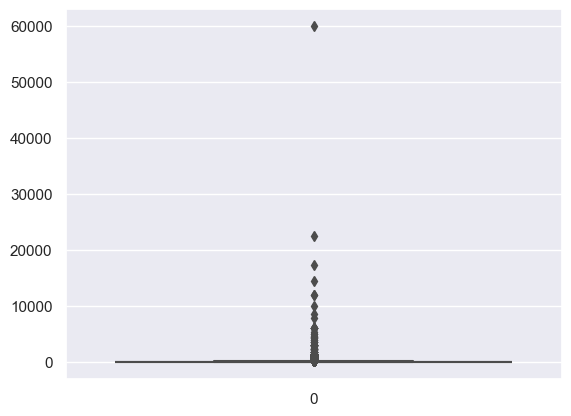

In [612]:
sns.boxplot(df['play_time'])


In [613]:
df[df['play_time']==60000]


,id,name,year_published,min_players,max_players,play_time,min_age,users_rated,rating_average,bgg_rank,complexity_average,owned_users,mechanics,domains
13420,4815,The Campaign for North Africa: The Desert War ...,1979,8,10,60000,14,146,6.1,13422,4.71,385.0,"Dice Rolling, Hexagon Grid, Simulation",Wargames


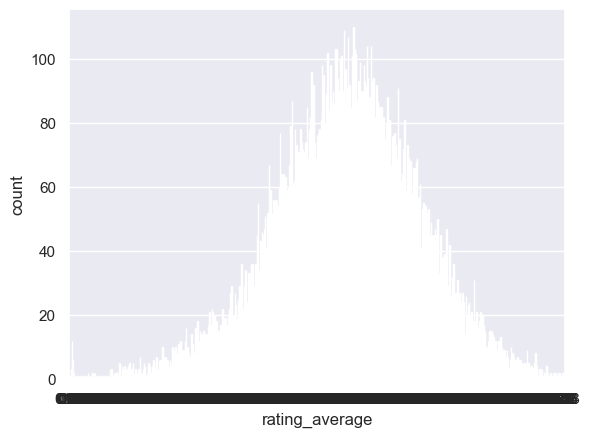

In [614]:
df.rating_average.value_counts()
sns.countplot(x="rating_average", data=df, palette="magma")
plt.show()


<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h3 
  id= "outliers"; 
  style="color:#8fca6b; border-bottom: 2px solid #8fca6b;"
>
  OUTLIERS
</h3>

In [615]:
df.describe()


,year_published,min_players,max_players,play_time,min_age,users_rated,rating_average,bgg_rank,complexity_average,owned_users
count,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20320.000000
mean,1984.152337,2.019712,5.672221,91.294548,9.601485,840.971391,6.395830,10172.890429,1.641283,1408.457628
std,214.449652,0.690366,15.231376,545.447203,3.645458,3511.562220,0.961102,5872.831597,1.138844,5040.179315
min,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.030000,1.000000,0.000000,0.000000
25%,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.810000,5087.500000,1.080000,146.000000
50%,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10173.000000,1.670000,309.000000
75%,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.500000,2.475000,864.000000
max,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,4.930000,155312.000000


In [616]:
year_published	min_players	max_players	play_time	min_age	users_rated	rating_average	bgg_rank	complexity_average	owned_users


SyntaxError: invalid syntax (2555401156.py, line 1)

(-0.5, 10.5, 0.0, 10.0)

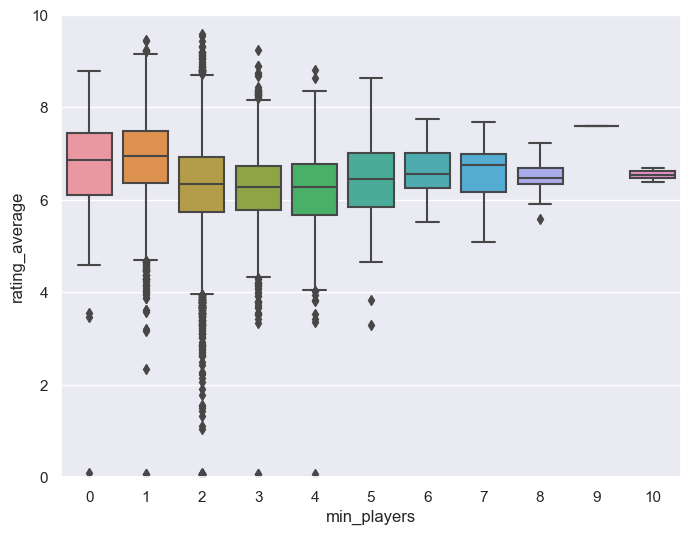

In [ ]:
var = 'min_players'
data = df[['rating_average',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rating_average", data=data)
fig.axis(ymin=-0, ymax=10)


<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 
  id= "feature-engineering"; 
  style="color:#207d06; border-bottom: 3px solid #207d06;"
>
  FEATURE ENGINEERING
</h2>

<h3 
  id= "game-mechanics"; 
  style="color:#8fca6b; border-bottom: 2px solid #8fca6b;"
>
  GAME MECHANICS
</h3>

In [ ]:
df['mechanics'].isna().sum()


1598

In [ ]:
df[df['mechanics'] == 0].shape[0]


0

In [ ]:
df['mechanics'].fillna('', inplace=True)
df['mechanics'].isna().sum()


0

In [ ]:
mech = df[['name', 'mechanics']].copy()
mech['mechanics'] = mech['mechanics'].apply(lambda x: x.split(', '))

mech.head()


,name,mechanics
0,Gloomhaven,"[Action Queue, Action Retrieval, Campaign / Ba..."
1,Pandemic Legacy: Season 1,"[Action Points, Cooperative Game, Hand Managem..."
2,Brass: Birmingham,"[Hand Management, Income, Loans, Market, Netwo..."
3,Terraforming Mars,"[Card Drafting, Drafting, End Game Bonuses, Ha..."
4,Twilight Imperium: Fourth Edition,"[Action Drafting, Area Majority / Influence, A..."


In [ ]:
s1 = set(mech['mechanics'][0])

s1 = set()
mech['mechanics'] = mech['mechanics'].apply(lambda x: set(x))

for i in mech['mechanics']:
  s1 |= i

len(s1)



183

In [ ]:
for item in s1:
  mech[item] = mech['mechanics'].apply(lambda x: int(item in x))

temp = mech.drop(columns=['mechanics', '']).copy()

print(temp.shape)
temp.head()


(20343, 183)


,name,Auction/Bidding,Turn Order: Claim Action,Chaining,Single Loser Game,Auction: Turn Order Until Pass,Ratio / Combat Results Table,Roll / Spin and Move,Follow,King of the Hill,...,Stock Holding,Communication Limits,Pattern Movement,Re-rolling and Locking,Turn Order: Pass Order,Map Reduction,Auction: Fixed Placement,Physical Removal,Closed Economy Auction,Relative Movement
0,Gloomhaven,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Pandemic Legacy: Season 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Brass: Birmingham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Terraforming Mars,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Twilight Imperium: Fourth Edition,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# create list of column titles
cols = temp.columns.tolist()

# change the spaces to underscores
cols = [x.replace(' ', '_') for x in cols]
cols = [x.replace('_/_', '/') for x in cols]

# convert all to lower case
cols = [x.lower() for x in cols]

# confirm results by printing a few,
cols[:4]


['name', 'auction/bidding', 'turn_order:_claim_action', 'chaining']

In [ ]:
# Create a dictionary keying the old headings to the new:
old_cols = temp.columns.tolist()
col_map = dict(zip(old_cols, cols))

# Rename the columns in the table.
temp = temp.rename(columns=col_map)

mech = temp.copy()
mech.head(2)



,name,auction/bidding,turn_order:_claim_action,chaining,single_loser_game,auction:_turn_order_until_pass,ratio/combat_results_table,roll/spin_and_move,follow,king_of_the_hill,...,stock_holding,communication_limits,pattern_movement,re-rolling_and_locking,turn_order:_pass_order,map_reduction,auction:_fixed_placement,physical_removal,closed_economy_auction,relative_movement
0,Gloomhaven,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Pandemic Legacy: Season 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Save One-hot-encoded mechanics to csv file:
mech.to_csv(f'../data/df_mechanics_dummies_{session}.csv', index=False)


In [ ]:
mech.index = mech.name


In [ ]:
mech.drop([col for col, val in mech.sum().iteritems() if int(val) < 10], axis=1, inplace=True)
mech.shape()


AttributeError: 'numpy.int64' object has no attribute 'iteritems'

In [ ]:
full = df.merge(mech)
full.head(1)


,id,name,year_published,min_players,max_players,play_time,min_age,users_rated,rating_average,bgg_rank,...,stock_holding,communication_limits,pattern_movement,re-rolling_and_locking,turn_order:_pass_order,map_reduction,auction:_fixed_placement,physical_removal,closed_economy_auction,relative_movement
0,174430,Gloomhaven,2017,1,4,120,14,42055,8.79,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
full.drop(columns=['id', 'name', 'year_published'], inplace=True)


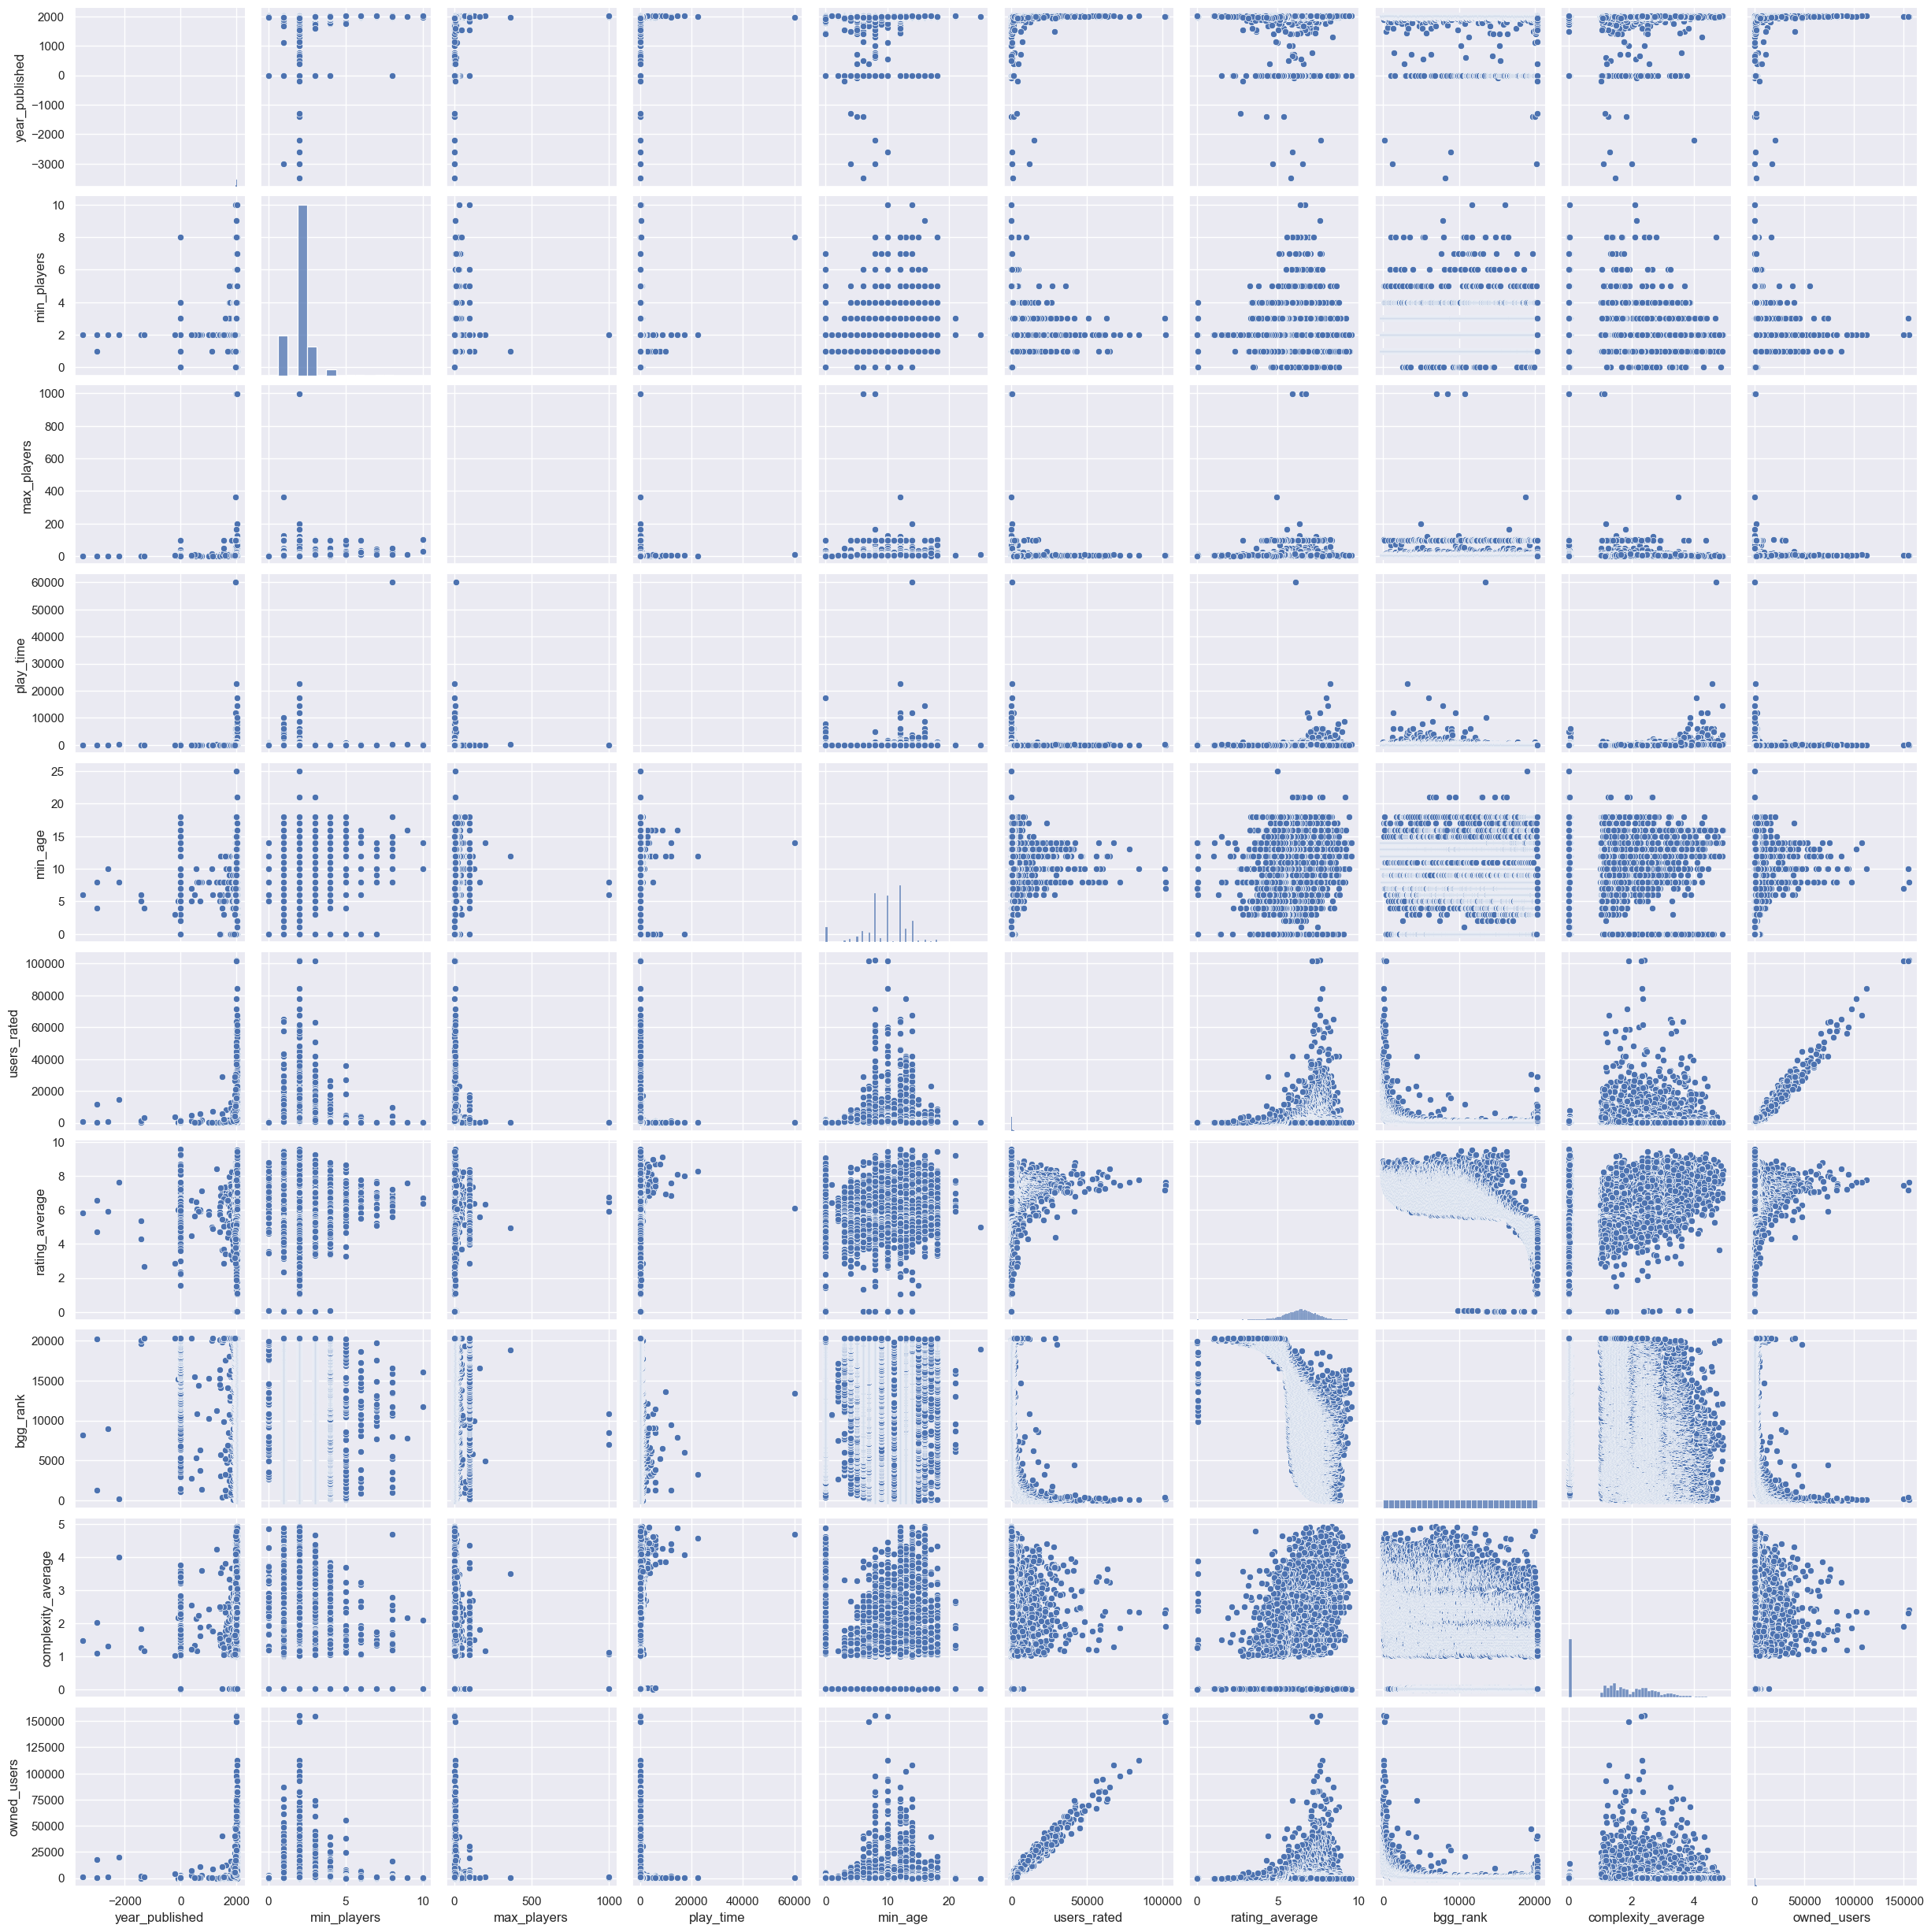

In [ ]:
sns.pairplot(data=df)
plt.show()


<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 
  id= "modeling"; 
  style="color:#207d06; border-bottom: 3px solid #207d06;"
>
  MODELING
</h2>

<h3 
  id= "splitting-data"; 
  style="color:#8fca6b; border-bottom: 2px solid #8fca6b;"
>
  SPLITTING DATA
</h3>

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h3 
  id= "model-training"; 
  style="color:#8fca6b; border-bottom: 2px solid #8fca6b;"
>
  MODEL TRAINING
</h3>

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h3 
  id= "model-evaluation"; 
  style="color:#8fca6b; border-bottom: 2px solid #8fca6b;"
>
  MODEL EVALUATION
</h3>

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 
  id= "tune-hyperparameters"; 
  style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;"
>
  TUNE HYPERPARAMETERS
</h2>

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 
  id= "discussion"; 
  style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;"
>
  DISCUSSION
</h2>

<h5 style="text-align:right; padding-right: 10%;">
  <a href="#title">Top Of Page</a> / <a href="#table-of-contents">TOC</a>
</h5>

<h2 
  id= "references"; 
  style="color:#207d06; border-bottom: 3px solid #207d06;"
>
  REFERENCES
</h2>

**Data Source:** Dilini Samarasinghe, July 5, 2021, "BoardGameGeek Dataset on Board Games", IEEE Dataport, doi: https://dx.doi.org/10.21227/9g61-bs59.

[BoardGameGeek](https://boardgamegeek.com/) by Scott Alden and Derk Solko (2000). https://boardgamegeek.com/

BoardGameGeek wiki - [Ratings](https://boardgamegeek.com/wiki/page/ratings#:~:text=This%20is%20the%20rating%20that,ratings%2C%20based%20on%20this%20thread)